## 1. 판다스를 사용한 데이터 시각화

### (1) Pandas를 사용한 데이터 시각화 역량 개요

- Pandas 플롯을 사용자가 정의하는 기본 원리 학습
- `Matplotlib` 라이브러리 활용
- Pandas는 플롯을 매우 간단한 한 줄의 세그먼트로 이루어진 코드로 만듦

### 2.  Pandas를 사용한 데이터 시각화

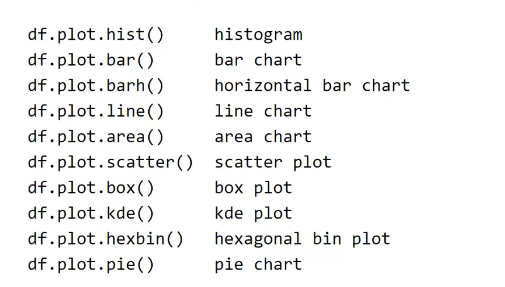

In [1]:
import os

In [2]:
import pandas as pd
%matplotlib inline

In [3]:
df1 = pd.read_csv('data/df1.csv', index_col=0)

In [4]:
df1.head()

,A,B,C,D
2000-01-01,1.339091,-0.163643,-0.646443,1.041233
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
2000-01-04,-1.738808,-0.072973,0.056517,0.015085
2000-01-05,-0.905980,1.778576,0.381918,0.291436


In [5]:
df2 = pd.read_csv('data/df2.csv')
df2.head()

,a,b,c,d,e
0,0.039762,0.218517,0.103423,0.957904,x
1,0.937288,0.041567,0.899125,0.977680,y
2,0.780504,0.008948,0.557808,0.797510,x
3,0.672717,0.247870,0.264071,0.444358,z
4,0.053829,0.520124,0.552264,0.190008,y


---

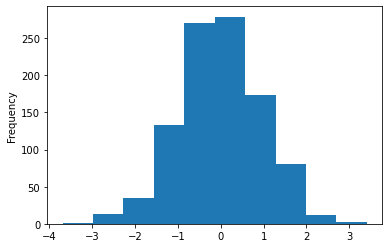

In [7]:
df1['A'].plot.hist();

-> 히스토그램

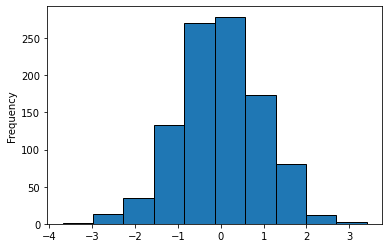

In [13]:
df1['A'].plot.hist(edgecolor='k');

-> bin에 해당하는 까만색 막대기

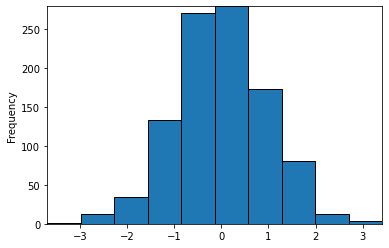

In [15]:
# 끝 부분을 빈의 가장자리에 오게끔 맞추기

df1['A'].plot.hist(edgecolor='k').autoscale(enable=True, axis='both', tight=True);

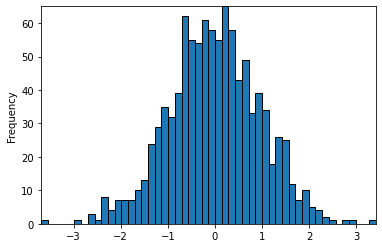

In [16]:
# 분포에 대해 더욱 명확하게 하기 

df1['A'].plot.hist(bins=50, edgecolor='k').autoscale(enable=True, axis='both', tight=True);

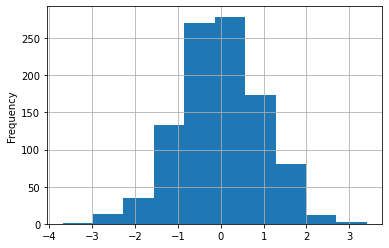

In [17]:
# 빈 크기에 대한 주기 세기

df1['A'].plot.hist(grid=True);

In [18]:
df2

,a,b,c,d,e
0,0.039762,0.218517,0.103423,0.957904,x
1,0.937288,0.041567,0.899125,0.977680,y
2,0.780504,0.008948,0.557808,0.797510,x
3,0.672717,0.247870,0.264071,0.444358,z
4,0.053829,0.520124,0.552264,0.190008,y
5,0.286043,0.593465,0.907307,0.637898,x
6,0.430436,0.166230,0.469383,0.497701,z
7,0.312296,0.502823,0.806609,0.850519,z
8,0.187765,0.997075,0.895955,0.530390,x
9,0.908162,0.232726,0.414138,0.432007,y


<AxesSubplot:>

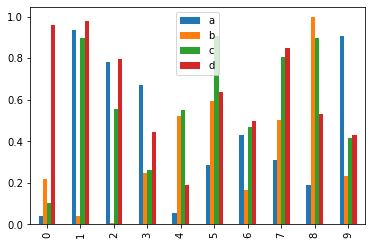

In [19]:
df2.plot.bar()

-> 'e'는 숫자가 아닌 범주형이기 때문에 인식되지 않음

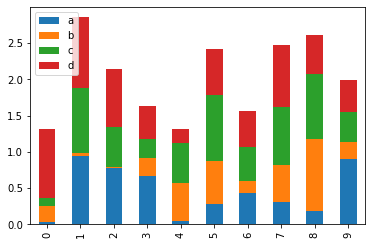

In [20]:
df2.plot.bar(stacked=True);

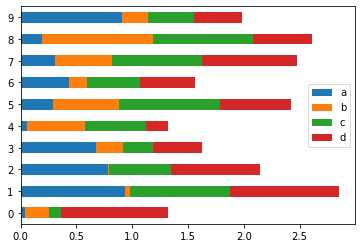

In [21]:
df2.plot.barh(stacked=True);

#### 선플롯(시계열 데이터 분석시 내내 사용)

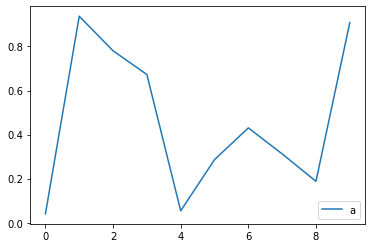

In [22]:
df2.plot.line(y='a');

-> 인덱스를 범주로 취한 대신, 연속 값을 가지게 된 것 

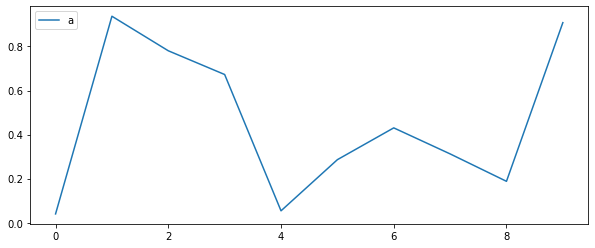

In [23]:
df2.plot.line(y='a', figsize=(10,4));

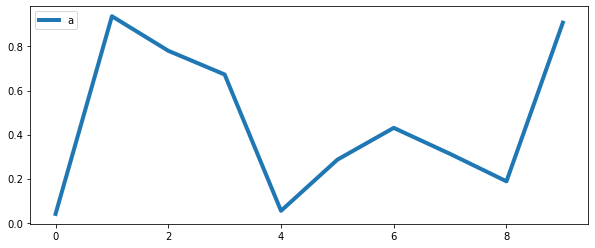

In [24]:
df2.plot.line(y='a', figsize=(10,4), lw=4);

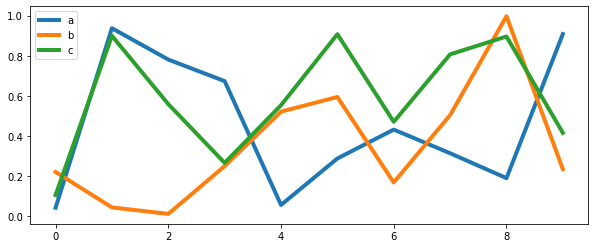

In [25]:
df2.plot.line(y=['a', 'b', 'c'], figsize=(10,4), lw=4);

-> 자동적으로 x를 인덱스로 취함

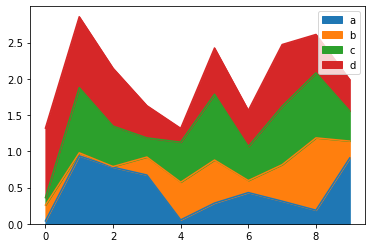

In [27]:
df2.plot.area();

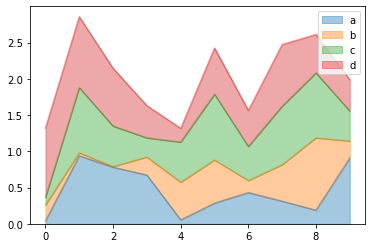

In [28]:
df2.plot.area(alpha=0.4); # 투명도반영

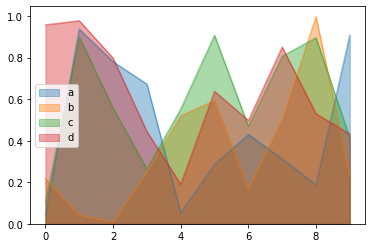

In [29]:
df2.plot.area(stacked=False, alpha=0.4); # 투명도반영

### 산점도 플롯

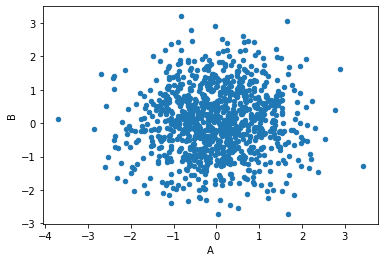

In [31]:
df1.plot.scatter(x='A', y='B');

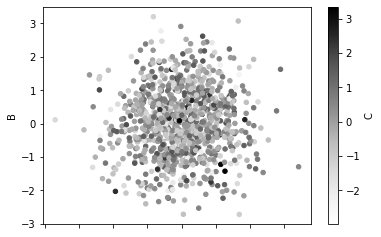

In [32]:
df1.plot.scatter(x='A', y='B', c='C');

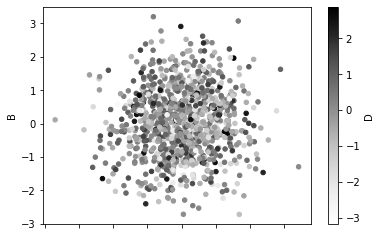

In [33]:
df1.plot.scatter(x='A', y='B', c='D');

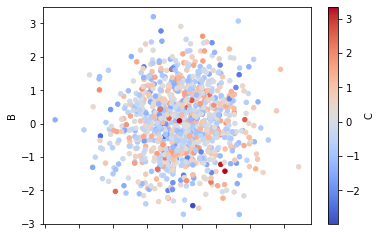

In [34]:
df1.plot.scatter(x='A', y='B', c='C', cmap='coolwarm');

-> A,B,C열 사이 관계가 있다는 것을 의미 (C는 A와 B에 속한 값)

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


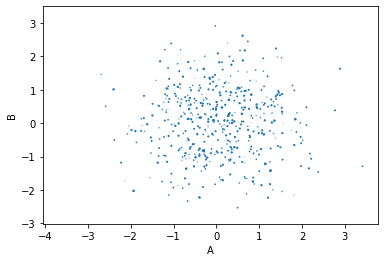

In [37]:
df1.plot.scatter(x='A', y='B', s=df1['C']);

-> s는 문자열이 아닌 배열을 예상함
-> 위의 경고는 음수 값이 있다는 증거(음수 값으로는 크기를 조정할 수 없음)
-> 현지는 c의 값이 굉장히 작아서 산점도 플롯에서 작은 원가 큰 점의 차이점을 뚜렷하게 확인하기 어려움

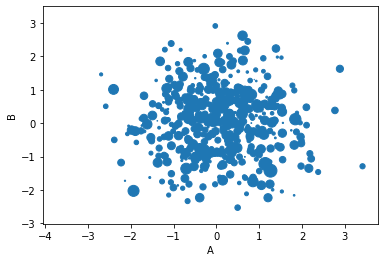

In [38]:
df1.plot.scatter(x='A', y='B', s=df1['C']*50);

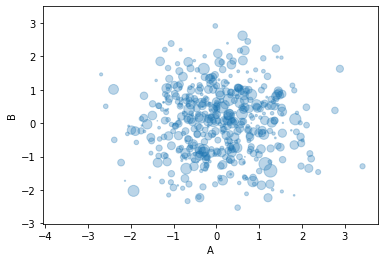

In [39]:
df1.plot.scatter(x='A', y='B', s=df1['C']*50, alpha=0.3);

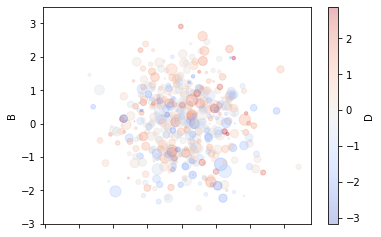

In [40]:
df1.plot.scatter(x='A', y='B', s=df1['C']*50,  c= 'D', cmap='coolwarm', alpha=0.3);

### 박스 플롯

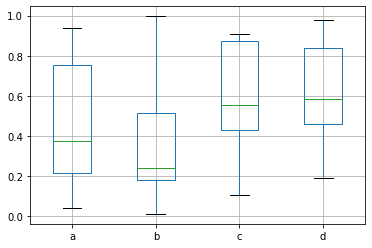

In [43]:
df2.boxplot();

-> 각 열당 분포를 나타내고, 연속 열만 표시되며 사분위수를 보여줌

### 커널 밀도 추정 플롯
- 기본 분포를 보여준다는 점에서 히스토그램과 비슷함
- 분포 선을 이용한다는 점이 다름

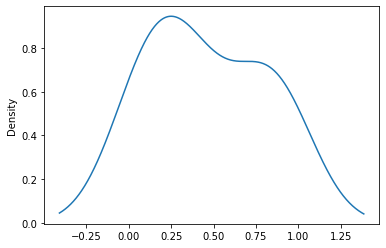

In [44]:
df2['a'].plot.kde();

-> 특정 열에 대한 추정 분포를 나타냄

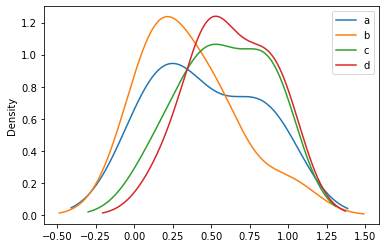

In [45]:
df2.plot.kde();

### 육각형 빈 플롯

In [46]:
import numpy as np

df = pd.DataFrame(np.random.randn(1000,2), columns=['a','b'])
df

,a,b
0,-0.063937,-0.797041
1,1.125391,1.131455
2,-1.220526,-0.461105
3,-0.749751,0.268061
4,0.912541,0.904064
...,...,...
995,-1.183660,0.060923
996,-1.368275,0.122592
997,-1.222501,0.885382
998,1.740616,0.396944


<AxesSubplot:xlabel='a', ylabel='b'>

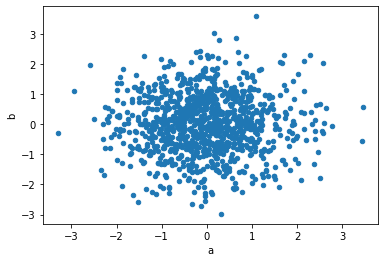

In [47]:
df.plot.scatter(x='a', y='b')

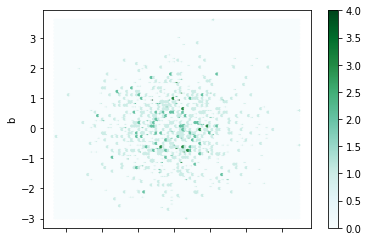

In [48]:
df.plot.hexbin(x='a', y='b');

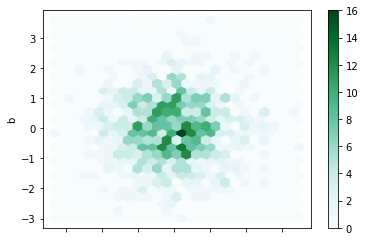

In [49]:
df.plot.hexbin(x='a', y='b', gridsize=25);

-> 중아으로 갈수록 0과 0주변에 많은 포인트가 있음. 둘다 보통 가장자리보다는 해당 장소에 많이 분포 됨

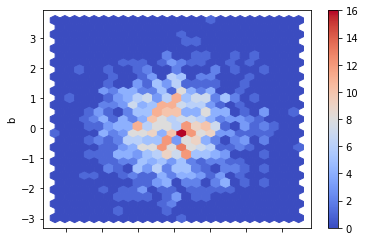

In [50]:
df.plot.hexbin(x='a', y='b', gridsize=25, cmap='coolwarm');

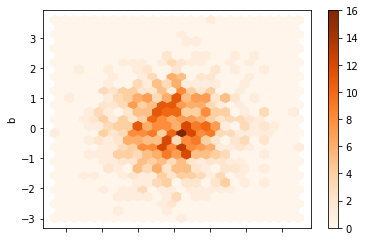

In [54]:
df.plot.hexbin(x='a', y='b', gridsize=25, cmap='Oranges');

## 2. Pandas를 사용한 시계열 
###  (1) Pandas 데이터 시각화 연습